# 로지스틱 회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
X = iris.data[:, 3:] # 꽃잎 폭
y = (iris.target==2).astype(np.int32) # Virginica 이면 1, 아니면 0

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

In [15]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_new)

In [22]:
print(y_prob[1][0]) # virginica 가 아닐(0) 확률
print(y_prob[1][1]) # virginica 일(1) 확률
print(y_prob[1][0] + y_prob[1][1])

0.9992402006127165

[1.66066066]


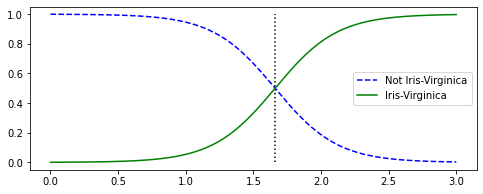

In [51]:
decision_boundary = X_new[y_prob[:, 1] > 0.5][0]
print(decision_boundary)
plt.figure(figsize=(8, 3))
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:")
plt.plot(X_new, y_prob[:, 0], "b--", label="Not Iris-Virginica") # virginica 아닐(0)  확률
plt.plot(X_new, y_prob[:, 1], "g-", label="Iris-Virginica") # virginica 일(1) 확률
plt.legend(loc="best")
plt.show()

In [52]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

# 소프트 맥스 회귀

In [53]:
X = iris.data[:, (2,3)] # 꽃잎 길이, 꽃잎 폭
y = iris.target

In [55]:
softmax_reg = LogisticRegression(multi_class="multinomial", random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(multi_class='multinomial', random_state=42)

In [57]:
softmax_reg.predict([[5, 2]]) # virginica 품종으로 예측

array([2])

In [62]:
prediction_prob = softmax_reg.predict_proba([X[0]])

In [64]:
prediction_prob

array([[9.79830583e-01, 2.01693853e-02, 3.14621610e-08]])

In [65]:
prediction_prob[0][0], prediction_prob[0][1], prediction_prob[0][2]

(0.9798305832828496, 0.02016938525498948, 3.146216097021159e-08)

In [66]:
softmax_reg.predict([X[0]])

array([0])

In [73]:
softmax_reg.coef_

array([[-2.74866104, -1.16890756],
       [ 0.08356447, -0.90803047],
       [ 2.66509657,  2.07693804]])

In [ ]:
# (참고) OVA(OVR) 이진 분류기 여러개를 학습시킬 때

In [75]:
softmax_reg2 = LogisticRegression(multi_class="ovr", random_state=42)
softmax_reg2.fit(X, y)

LogisticRegression(multi_class='ovr', random_state=42)

In [76]:
softmax_reg2.predict([X[0]])

array([0])

In [77]:
softmax_reg2.coef_

array([[-2.59326344, -1.07701465],
       [ 0.8860989 , -1.54144389],
       [ 2.77762524,  2.38552012]])